In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

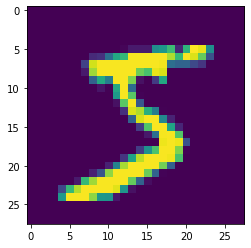

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2624 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1078 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9872


In [8]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9686
0.9685999751091003
0.10639238357543945


In [9]:
model.save('digits.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digits.model\assets


The result is probably: 3


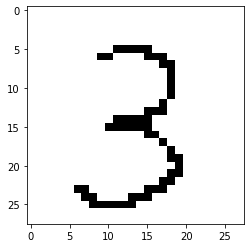

In [11]:
for x in range(2,3):
    img = cv.imread(f'{x}.png')[:,:,0]
    img = np.invert(np.array([img])) #in next step, instead of white over black, we get black over white
    prediction = model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0],cmap=plt.cm.binary) #white over black bg
    plt.show()
    